# VGG-Net

## 1-加載 Library

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


## 2-數據集處理

In [2]:
# 回傳值: ((訓練特徵, 訓練目標), (測試特徵, 測試目標))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

170500096/170498071 [==============================] - 6s 0us/step


圖片答案是 卡車


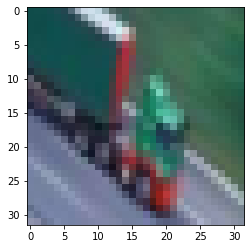

In [3]:
a = 50
print("圖片答案是", label[y_train[a][0]])
plt.imshow(x_train[a])

In [0]:
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

## 3-建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=256,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    


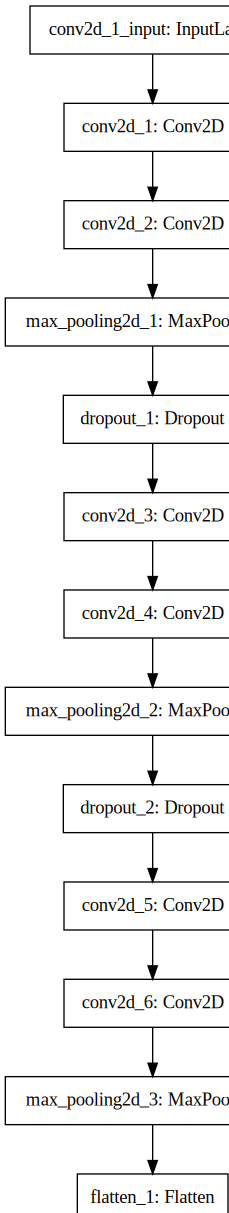

In [8]:
# 需要安裝(pip install pydotplus)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [10]:
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,
                          epochs = 25,
                          batch_size = 200,
                          verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/25





 - 38s - loss: 1.7612 - acc: 0.3432 - val_loss: 1.4324 - val_acc: 0.4836
Epoch 2/25
 - 24s - loss: 1.2509 - acc: 0.5478 - val_loss: 1.0354 - val_acc: 0.6368
Epoch 3/25
 - 24s - loss: 1.0210 - acc: 0.6350 - val_loss: 0.8853 - val_acc: 0.6900
Epoch 4/25
 - 24s - loss: 0.8633 - acc: 0.6943 - val_loss: 0.7786 - val_acc: 0.7272
Epoch 5/25
 - 24s - loss: 0.7473 - acc: 0.7363 - val_loss: 0.6663 - val_acc: 0.7692
Epoch 6/25
 - 24s - loss: 0.6576 - acc: 0.7685 - val_loss: 0.6391 - val_acc: 0.7798
Epoch 7/25
 - 24s - loss: 0.5809 - acc: 0.7932 - val_loss: 0.5891 - val_acc: 0.7966
Epoch 8/25
 - 24s - loss: 0.5250 - acc: 0.8158 - val_loss: 0.5581 - val_acc: 0.8082
Epoch 9/25
 - 24s - loss: 0.4680 - acc: 0.8358 - val_loss: 0.5653 - val_acc: 0.8104
Epoch 10/25
 - 24s - loss: 0.4316 - acc: 0.8479 - val_loss: 0.5216 - val_acc: 0.8194
Epoch 11

## 4-繪圖(Non-Linear SVM)的決策邊界

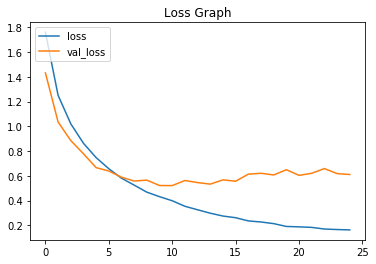

In [11]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

## 5-模型準確率分析

In [12]:
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])

預測標籤: [5, 8, 8, 0, 6]
正確標籤: [array([3]), array([8]), array([8]), array([0]), array([6])]


In [13]:
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")

10000/10000 [==============================] - 3s 284us/step
衡量係數: [0.6753421170949936, 0.8227]
正確率: 82.27 %


# 6-保存模型

In [0]:
model.save('./models/vgg.h5')